In [1]:
import collections
import random

import pandas
import numpy

from curve_fits import Call

from curve_fits import frames

In [2]:
index = numpy.arange(0, 15, 0.2)
std = 15
frame = frames.FittingFrame({
    'second': [random.gauss(1 + x**2/2, std) for x in index],
    'third': [random.gauss(1 + x**2/2 - x**3/6, std) for x in index],
    'fourth': [random.gauss(1 + x**2/2 - x**3/6 + x**4/24, std) for x in index],
}, index=index)
frame.fit(second=[Call('polynomial', 1, 2)],
          third=[Call('polynomial', 1, 2, 3)],
          fourth=[Call('polynomial', 1, 2, 3, 4)])

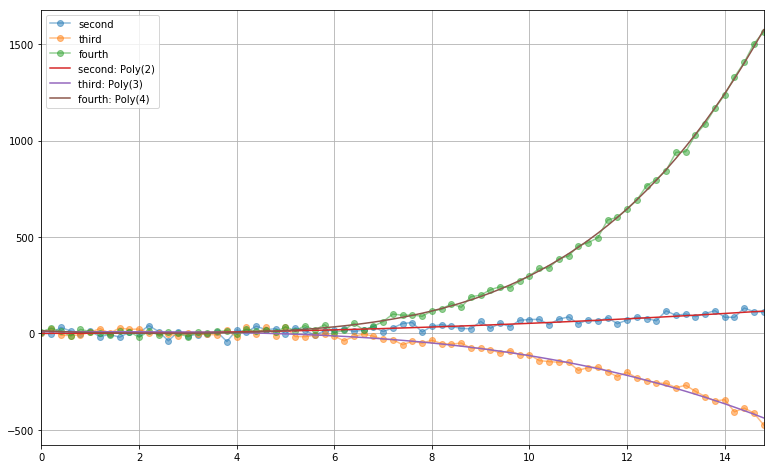

In [3]:
frame.plot(limit=1)

In [4]:
fits = frame.best_fits(limit=None)
fits

kind                                                fit  \
key    cost                                                                    
second 6.382753   Poly(2)     (0.6 ± 6.1) + (-0.3 ± 1.9)x + (0.54 ± 0.12)x^2   
       8.187329   Poly(1)                     (-20.8 ± 4.6) + (8.10 ± 0.56)x   
third  6.232697   Poly(3)  (9.3 ± 7.5) + (-0.7 ± 4.3)x + (0.54 ± 0.66)x^2...   
       7.282272   Poly(2)  (-18.7 ± 6.2) + (22.0 ± 2.0)x + (-3.28 ± 0.13)x^2   
       21.593081  Poly(1)                        (100 ± 14) + (-26.8 ± 1.7)x   
fourth 5.241420   Poly(4)  (13.6 ± 8.4) + (-11.3 ± 7.7)x + (3.1 ± 2.1)x^2...   
       7.128751   Poly(3)  (-26 ± 11) + (37.6 ± 6.1)x + (-11.24 ± 0.91)x^...   
       28.950251  Poly(2)    (136 ± 24) + (-99.5 ± 7.7)x + (12.31 ± 0.51)x^2   
       82.393351  Poly(1)                        (-313 ± 55) + (84.5 ± 6.4)x   

                 DOF  
key    cost           
second 6.382753    2  
       8.187329    1  
third  6.232697    3  
       7.282272    2  
       21.593081   1  
fourth 5.241420    4  
       7.128751    3  
       28.950251   2  
       82.393351   1

In [5]:
expected_kinds = {'second': ['Poly(2)', 'Poly(1)'],
                  'third': ['Poly(3)', 'Poly(2)', 'Poly(1)'],
                  'fourth': ['Poly(4)', 'Poly(3)', 'Poly(2)', 'Poly(1)']}

assert {k: list(fits.loc[k, 'kind']) for k in expected_kinds} == expected_kinds